In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import missingno

import time
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer

from scipy.stats import pearsonr, chi2_contingency
from itertools import combinations
from sklearn.decomposition import PCA

In [ ]:
df_orders = pd.read_csv('/content/drive/MyDrive/ML_Practice/05_customer_clustering_ml/olist_orders_dataset.csv',sep=',', parse_dates=['order_purchase_timestamp', 'order_estimated_delivery_date', 'order_delivered_customer_date'])
df_customers = pd.read_csv('/content/drive/MyDrive/ML_Practice/05_customer_clustering_ml/olist_customers_dataset.csv',sep=',')
df_payments = pd.read_csv('/content/drive/MyDrive/ML_Practice/05_customer_clustering_ml/olist_order_payments_dataset.csv',sep=',')
df_reviews = pd.read_csv('/content/drive/MyDrive/ML_Practice/05_customer_clustering_ml/olist_order_reviews_dataset.csv',sep=',')
df_geolocation = pd.read_csv("/content/drive/MyDrive/ML_Practice/05_customer_clustering_ml/olist_geolocation_dataset.csv", sep=',')
df_items = pd.read_csv('/content/drive/MyDrive/ML_Practice/05_customer_clustering_ml/olist_order_items_dataset.csv',sep=',')
df_products = pd.read_csv('/content/drive/MyDrive/ML_Practice/05_customer_clustering_ml/olist_products_dataset.csv',sep=',')
product_translations = pd.read_csv('/content/drive/MyDrive/ML_Practice/05_customer_clustering_ml/product_category_name_translation.csv',sep=',')
df_sellers= pd.read_csv('/content/drive/MyDrive/ML_Practice/05_customer_clustering_ml/olist_sellers_dataset.csv',sep=',')

### 데이터 탐색하기

In [ ]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


> df_orders : 주문 아이디, 고객 아이디, 주문 시간, 배송 날짜 등

In [ ]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


> df_customers : 고객 아이디, 고객 고유 아이디, 고객 우편번호 등 주소 정보

In [ ]:
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


> df_payments : 주문 아이디, 결제 정보 등

In [ ]:
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


> df_items : 주문 아이디, 주문 상품 아이디, 물품 아이디, 가격, 운송비 등


In [ ]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


> df_products : 물품 아이디, 물품 카테고리, 상품 길이 등 상품 정보

In [ ]:
product_translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


목적 : 고객 군집화



### 데이터 합치기
고객 정보 + 주문 정보 + 결제 정보 + 상품 정보 



추가로 상품 카테고리, 카테고리 번역 정보도 추가

#### df_customers와 df_orders 결합
고객 아이디, 고객 고유 아이디 + 주문 번호, 고객 아이디, 주문 시간
> 주문한 고객 정보 추출



In [ ]:
customer_order_df = pd.merge(df_customers[['customer_id','customer_unique_id','customer_zip_code_prefix']],df_orders[['order_id','customer_id','order_purchase_timestamp']],how='inner',on='customer_id')

In [ ]:
customer_order_df.shape

(99441, 5)

### customer_order_df와 df_payments 결합


In [ ]:
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
customer_order_pay_df = customer_order_df.merge(df_payments, how='inner',on='order_id')

In [ ]:
customer_order_pay_df.shape

(103886, 9)

### customer_order_pay_df 와 df_items(상품 정보) 결합

In [ ]:
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_pay_item_df = customer_order_pay_df.merge(df_items[['order_id','product_id','price','freight_value']],how='inner',on='order_id')

In [ ]:
order_pay_item_df.shape

(117601, 12)

products와 번역된 데이터 결합

In [ ]:
product_translations

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [ ]:
translated_df = df_products.merge(product_translations, how = 'left', on = 'product_category_name')
translated_df.shape

(32951, 10)

### order_pay_item_df와 translated_df 결합


In [ ]:
df_products_bought = order_pay_item_df.merge(translated_df[['product_id','product_category_name_english']], how = 'inner', left_on = 'product_id', right_on = 'product_id')
df_products_bought.shape

(117601, 13)

In [ ]:
df_products_bought

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_id,price,freight_value,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,credit_card,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,1,credit_card,1,275.79,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,1,credit_card,1,275.79,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,1,credit_card,7,140.61,a9516a079e37a9c9c36b9b78b10169e8,124.99,15.62,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,1,credit_card,10,137.58,a9516a079e37a9c9c36b9b78b10169e8,106.99,30.59,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,c8203bb57639618630affac9e8e923dd,2017-03-27 23:04:18,1,credit_card,1,30.95,aea06073397f809424f946979354c9f0,19.99,10.96,pet_shop
117597,184e0c2cfc746789643521df0e9ff904,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,45b3000bcd10464ac178f32cd783fc83,2017-12-07 23:55:46,1,credit_card,4,304.11,bbf975bffd2ae9ee52f513ae5c8a4b27,250.00,54.11,health_beauty
117598,821a7275a08f32975caceff2e08ea262,046470763123d3d6364f89095b4e47ab,5734,49645a8902c1ba980836b7bff991d69f,2018-04-04 17:50:52,1,credit_card,3,92.36,f6e0a9ce8a6e91c3a0ca2d3005911d20,84.90,7.46,fashion_bags_accessories
117599,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,51c6d2f460589fa7b65f2da51e860206,2017-11-14 12:04:09,1,credit_card,5,167.79,c98bf47f7bea8f3aee82fa023786b8a1,167.99,31.93,electronics


### 리뷰 데이터 합치기

In [ ]:
# 리뷰가 있는 데이터만 사용
prd_pay_review = df_products_bought.merge(df_reviews[['order_id','review_score']], how = 'inner', left_on = 'order_id', right_on = 'order_id')  
prd_pay_review

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_id,price,freight_value,product_category_name_english,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,credit_card,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,office_furniture,4
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,1,credit_card,1,275.79,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,office_furniture,1
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,1,credit_card,1,275.79,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,office_furniture,1
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,1,credit_card,7,140.61,a9516a079e37a9c9c36b9b78b10169e8,124.99,15.62,office_furniture,3
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,1,credit_card,10,137.58,a9516a079e37a9c9c36b9b78b10169e8,106.99,30.59,office_furniture,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,c8203bb57639618630affac9e8e923dd,2017-03-27 23:04:18,1,credit_card,1,30.95,aea06073397f809424f946979354c9f0,19.99,10.96,pet_shop,4
117325,184e0c2cfc746789643521df0e9ff904,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,45b3000bcd10464ac178f32cd783fc83,2017-12-07 23:55:46,1,credit_card,4,304.11,bbf975bffd2ae9ee52f513ae5c8a4b27,250.00,54.11,health_beauty,4
117326,821a7275a08f32975caceff2e08ea262,046470763123d3d6364f89095b4e47ab,5734,49645a8902c1ba980836b7bff991d69f,2018-04-04 17:50:52,1,credit_card,3,92.36,f6e0a9ce8a6e91c3a0ca2d3005911d20,84.90,7.46,fashion_bags_accessories,5
117327,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,51c6d2f460589fa7b65f2da51e860206,2017-11-14 12:04:09,1,credit_card,5,167.79,c98bf47f7bea8f3aee82fa023786b8a1,167.99,31.93,electronics,1


### 정리 
> 고객 고유 아이디와 고객 아이디를 기준으로 상품명,가격,운송비 등 확인
>
> (리뷰가 있는 데이터만을 사용)

In [ ]:
gb_products_bought = prd_pay_review.groupby(['customer_unique_id','customer_id']).agg({
    'product_category_name_english':'count',  # 구매 횟수
    'price':'sum', 
    'freight_value':'sum',
    'payment_value':'sum', 
    'review_score':'mean',  # 리뷰 평점 평균
    'order_purchase_timestamp':'max',  # 가장 최근에 구매한 날짜
    'order_id':'count'}).reset_index()  # 구매 횟수
    

In [ ]:
gb_products_bought

,customer_unique_id,customer_id,product_category_name_english,price,freight_value,payment_value,review_score,order_purchase_timestamp,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,fadbb3709178fc513abc1b2670aa1ad2,1,129.90,12.00,141.90,5.0,2018-05-10 10:56:27,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4cb282e167ae9234755102258dd52ee8,1,18.90,8.29,27.19,4.0,2018-05-07 11:11:27,1
2,0000f46a3911fa3c0805444483337064,9b3932a6253894a02c1df9d19004239f,1,69.00,17.22,86.22,3.0,2017-03-10 21:05:03,1
3,0000f6ccb0745a6a4b88665a16c9f078,914991f0c02ef0843c0e7010c819d642,1,25.99,17.63,43.62,4.0,2017-10-12 20:29:41,1
4,0004aac84e0df4da2b147fca70cf8255,47227568b10f5f58a524a75507e6992c,1,180.00,16.89,196.89,5.0,2017-11-14 19:45:42,1
...,...,...,...,...,...,...,...,...,...
97911,fffcf5a5ff07b0908bd4e2dbc735a684,74be082247cd677a147d83ee670e9d53,2,1570.00,497.42,4134.84,5.0,2017-06-08 21:00:36,2
97912,fffea47cd6d3cc0a88bd621562a9d061,0ecf8e0a08148af0bf313184f167670a,1,64.89,19.69,84.58,4.0,2017-12-10 20:07:56,1
97913,ffff371b4d645b6ecea244b27531430a,27f584b0f1dc4e610065c240f68b6be0,1,89.90,22.56,112.46,5.0,2017-02-07 15:49:16,1
97914,ffff5962728ec6157033ef9805bacc48,832a3b0254347d409512ae92eaf154a6,1,115.00,18.69,133.69,5.0,2018-05-02 15:17:41,1


In [ ]:
alldata = gb_products_bought.sort_values(by=['product_category_name_english'], ascending=False)

In [ ]:
alldata = alldata.rename(columns={"product_category_name_english": "prd_category"})

In [ ]:
alldata

,customer_unique_id,customer_id,prd_category,price,freight_value,payment_value,review_score,order_purchase_timestamp,order_id
59167,9a736b248f67d166d2fbb006bcb877c3,270c23a11d024a44c896d1894b261a83,63,2305.38,1082.34,483.96,5.0,2017-08-08 20:26:31,63
42816,6fbc7cdadbb522125f4b27ae9dee4060,13aa59158da63ba0e93ec6ac2c07aacb,38,3039.62,869.44,411.48,5.0,2017-09-23 14:56:45,38
53161,8af7ac63b2efbcbd88e5b11505e8098a,9af2372a1e49340278e7c1ef8d749f34,29,11383.95,1897.76,457.99,1.0,2017-04-20 12:45:34,29
33171,569aa12b73b5f7edeaa6f2a01603e381,92cd3ec6e2d643d4ebd0e3d6238f69e2,26,1299.74,329.94,62.68,5.0,2017-06-07 12:05:10,26
55249,90807fdb59eec2152bc977feeb6e47e7,2ba91e12e5e4c9f56b82b86d9031d329,24,2397.60,190.80,215.70,1.0,2017-11-25 13:54:39,24
...,...,...,...,...,...,...,...,...,...
72845,be1d30e4bf79928d1f7e62529c2e855a,90524e55a20cda4c520f6a6e893bda6f,0,17.90,17.93,35.83,3.0,2018-05-05 10:20:53,1
2125,058d6b83ce3623b02a4eb4e30e7dff81,43981e5a9d93f53478bc206f92df4b71,0,159.77,16.88,176.65,1.0,2018-03-05 09:21:49,1
24339,3f637bf3ed71ce82c9dfd9822a6c9f69,4032cde8ae95228972fedbfbb48bf6a1,0,149.00,14.79,163.79,2.0,2017-12-27 21:59:20,1
76338,c7595c2a24dc66529995c52bf2110e5c,4a4c09d4ad0ff0d20520bda4a709d1a6,0,124.80,20.11,144.91,5.0,2017-05-30 22:15:57,1


In [ ]:
df_products_bought

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_id,price,freight_value,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,credit_card,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,1,credit_card,1,275.79,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,1,credit_card,1,275.79,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,1,credit_card,7,140.61,a9516a079e37a9c9c36b9b78b10169e8,124.99,15.62,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,1,credit_card,10,137.58,a9516a079e37a9c9c36b9b78b10169e8,106.99,30.59,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,c8203bb57639618630affac9e8e923dd,2017-03-27 23:04:18,1,credit_card,1,30.95,aea06073397f809424f946979354c9f0,19.99,10.96,pet_shop
117597,184e0c2cfc746789643521df0e9ff904,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,45b3000bcd10464ac178f32cd783fc83,2017-12-07 23:55:46,1,credit_card,4,304.11,bbf975bffd2ae9ee52f513ae5c8a4b27,250.00,54.11,health_beauty
117598,821a7275a08f32975caceff2e08ea262,046470763123d3d6364f89095b4e47ab,5734,49645a8902c1ba980836b7bff991d69f,2018-04-04 17:50:52,1,credit_card,3,92.36,f6e0a9ce8a6e91c3a0ca2d3005911d20,84.90,7.46,fashion_bags_accessories
117599,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,51c6d2f460589fa7b65f2da51e860206,2017-11-14 12:04:09,1,credit_card,5,167.79,c98bf47f7bea8f3aee82fa023786b8a1,167.99,31.93,electronics


### 데이터 마이닝
- 고객의 마지막 구매일 확인
- 구매 횟수(order_id)

In [ ]:
data = alldata.copy()

In [ ]:
latestdate = np.max(alldata['order_purchase_timestamp'])
data['recent']=data['order_purchase_timestamp'].apply(lambda x: (latestdate-x).days)

In [ ]:
data= data.drop(['order_purchase_timestamp'], axis=1)

In [ ]:
data = data.rename(columns={"order_id": "frequency"})

In [ ]:
data

,customer_unique_id,customer_id,prd_category,price,freight_value,payment_value,review_score,frequency,recent
59167,9a736b248f67d166d2fbb006bcb877c3,270c23a11d024a44c896d1894b261a83,63,2305.38,1082.34,483.96,5.0,63,390
42816,6fbc7cdadbb522125f4b27ae9dee4060,13aa59158da63ba0e93ec6ac2c07aacb,38,3039.62,869.44,411.48,5.0,38,344
53161,8af7ac63b2efbcbd88e5b11505e8098a,9af2372a1e49340278e7c1ef8d749f34,29,11383.95,1897.76,457.99,1.0,29,500
33171,569aa12b73b5f7edeaa6f2a01603e381,92cd3ec6e2d643d4ebd0e3d6238f69e2,26,1299.74,329.94,62.68,5.0,26,452
55249,90807fdb59eec2152bc977feeb6e47e7,2ba91e12e5e4c9f56b82b86d9031d329,24,2397.60,190.80,215.70,1.0,24,281
...,...,...,...,...,...,...,...,...,...
72845,be1d30e4bf79928d1f7e62529c2e855a,90524e55a20cda4c520f6a6e893bda6f,0,17.90,17.93,35.83,3.0,1,120
2125,058d6b83ce3623b02a4eb4e30e7dff81,43981e5a9d93f53478bc206f92df4b71,0,159.77,16.88,176.65,1.0,1,181
24339,3f637bf3ed71ce82c9dfd9822a6c9f69,4032cde8ae95228972fedbfbb48bf6a1,0,149.00,14.79,163.79,2.0,1,249
76338,c7595c2a24dc66529995c52bf2110e5c,4a4c09d4ad0ff0d20520bda4a709d1a6,0,124.80,20.11,144.91,5.0,1,460


### 데이터 EDA

클러스터링, pca분석

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97916 entries, 59167 to 22963
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  97916 non-null  object 
 1   customer_id         97916 non-null  object 
 2   prd_category        97916 non-null  int64  
 3   price               97916 non-null  float64
 4   freight_value       97916 non-null  float64
 5   payment_value       97916 non-null  float64
 6   review_score        97916 non-null  float64
 7   frequency           97916 non-null  int64  
 8   recent              97916 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 7.5+ MB


In [ ]:
# 통계 확인
data.describe()


,prd_category,price,freight_value,payment_value,review_score,frequency,recent
count,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000
mean,1.180696,144.419720,23.998205,206.175995,4.105087,1.198262,244.655868
std,0.757040,240.848086,26.478078,608.563989,1.330286,0.749857,153.414213
min,0.000000,0.850000,0.000000,9.590000,1.000000,1.000000,0.000000
25%,1.000000,47.650000,14.080000,62.860000,4.000000,1.000000,120.000000
50%,1.000000,89.580000,17.600000,110.080000,5.000000,1.000000,226.000000
75%,1.000000,155.000000,25.630000,196.260000,5.000000,1.000000,355.000000
max,63.000000,13440.000000,1897.760000,109312.640000,5.000000,63.000000,728.000000


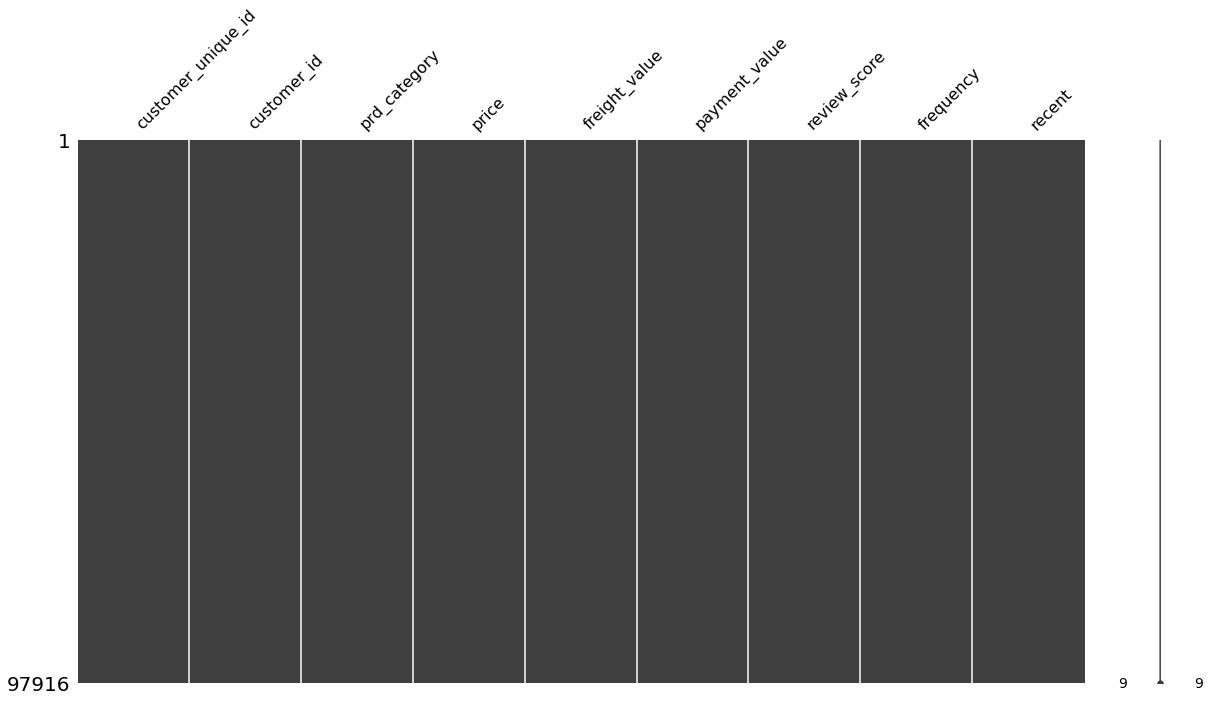

In [ ]:
# 결측치 확인
missingno.matrix(data, figsize=(20,10))

In [ ]:
# 중복확인
data.duplicated().sum()

0

In [ ]:
# 데이터 개수 확인
data.nunique()

customer_unique_id    94720
customer_id           97916
prd_category             26
price                  8150
freight_value          8401
payment_value         30078
review_score             11
frequency                25
recent                  614
dtype: int64

In [ ]:
data = data.drop(['customer_unique_id'],axis=1)

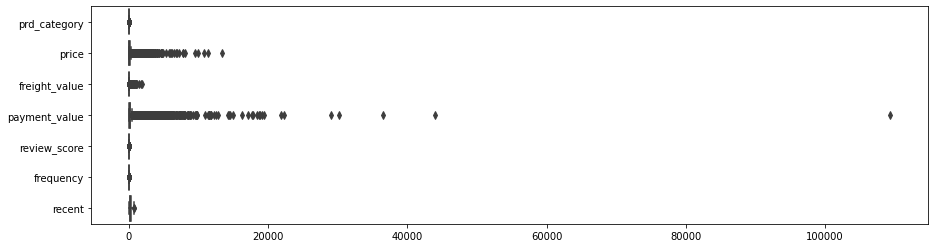

Index(['customer_id', 'prd_category', 'price', 'freight_value',
       'payment_value', 'review_score', 'frequency', 'recent'],
      dtype='object')


In [ ]:
# 이상치 확인
plt.figure(figsize = (15,4))
sns.boxplot(data = data, orient = "h")
plt.show()
print(data.columns)

> 이상치가 많을 때 클러스터링 분석이 어려울 수 있기 때문에 제거하는 것이 좋을 듯

In [ ]:
def detect_outliers(df, features):
    outlier_indices = []

    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 8 * IQR

        # 이상치 컬럼 리스트
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)        
    return outlier_indices

lof = ['price', 'payment_value']
Outliers_to_drop = detect_outliers(data, lof)

print(len(Outliers_to_drop))

1901


In [ ]:
data = data.drop(Outliers_to_drop)

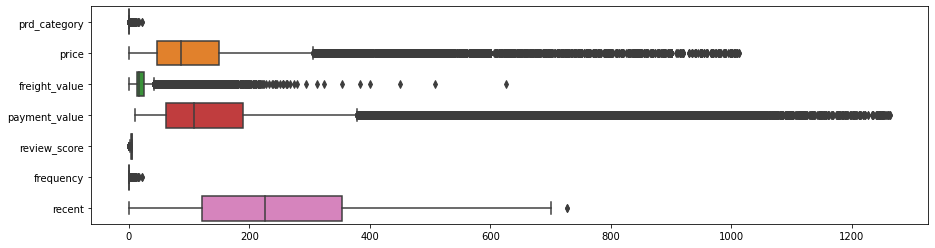

Index(['customer_id', 'prd_category', 'price', 'freight_value',
       'payment_value', 'review_score', 'frequency', 'recent'],
      dtype='object')


In [ ]:
# 이상치 확인
plt.figure(figsize = (15,4))
sns.boxplot(data = data, orient = "h")
plt.show()
print(data.columns)

#### 제품 카테고리별 데이터 분석 & 지역별 고객 정보

In [ ]:
prd_pay_review

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_id,price,freight_value,product_category_name_english,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,credit_card,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,office_furniture,4
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,1,credit_card,1,275.79,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,office_furniture,1
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,1,credit_card,1,275.79,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,office_furniture,1
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,1,credit_card,7,140.61,a9516a079e37a9c9c36b9b78b10169e8,124.99,15.62,office_furniture,3
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,1,credit_card,10,137.58,a9516a079e37a9c9c36b9b78b10169e8,106.99,30.59,office_furniture,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,c8203bb57639618630affac9e8e923dd,2017-03-27 23:04:18,1,credit_card,1,30.95,aea06073397f809424f946979354c9f0,19.99,10.96,pet_shop,4
117325,184e0c2cfc746789643521df0e9ff904,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,45b3000bcd10464ac178f32cd783fc83,2017-12-07 23:55:46,1,credit_card,4,304.11,bbf975bffd2ae9ee52f513ae5c8a4b27,250.00,54.11,health_beauty,4
117326,821a7275a08f32975caceff2e08ea262,046470763123d3d6364f89095b4e47ab,5734,49645a8902c1ba980836b7bff991d69f,2018-04-04 17:50:52,1,credit_card,3,92.36,f6e0a9ce8a6e91c3a0ca2d3005911d20,84.90,7.46,fashion_bags_accessories,5
117327,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,51c6d2f460589fa7b65f2da51e860206,2017-11-14 12:04:09,1,credit_card,5,167.79,c98bf47f7bea8f3aee82fa023786b8a1,167.99,31.93,electronics,1


In [ ]:
prd_pay_review.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
order_id                            0
order_purchase_timestamp            0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_id                          0
price                               0
freight_value                       0
product_category_name_english    1720
review_score                        0
dtype: int64

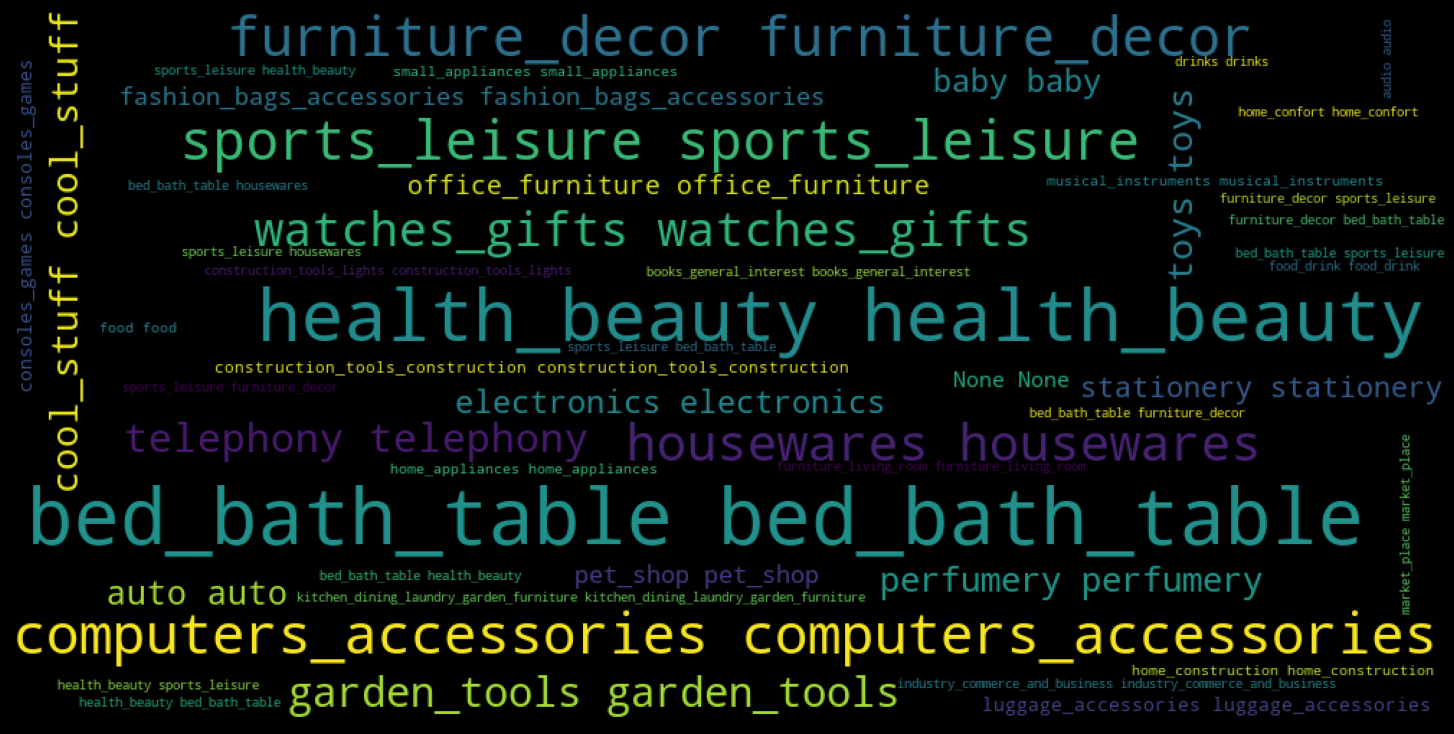

In [ ]:
prd_pay_review['product_category_name_english'].fillna("None", inplace = True) 

soup = ' '.join(prd_pay_review['product_category_name_english'])

wordcloud = WordCloud(width=1000, height=500,max_words=50)
wordcloud.generate(soup)
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

> bed_bath_table, health_beauty 관련 물품의 구매 빈도가 높음

In [ ]:
# 물품 카테고리 별 평균 구하기
product_rew = prd_pay_review.groupby(['product_category_name_english']).mean().reset_index()
# 평점으로 정렬하기
product_rew = product_rew.sort_values(by=['review_score'], ascending=False)

In [ ]:
product_rew

,product_category_name_english,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,price,freight_value,review_score
12,cds_dvds_musicals,44896.214286,1.000000,2.571429,85.673571,52.142857,16.070714,4.642857
30,fashion_childrens_clothes,33451.750000,1.000000,1.875000,98.208750,71.231250,11.938750,4.500000
9,books_general_interest,38479.231729,1.024955,2.351159,114.703012,85.420143,16.685936,4.438503
36,flowers,30938.322581,1.000000,1.387097,62.024839,32.265806,14.630645,4.419355
10,books_imported,23659.000000,1.032258,2.161290,108.095000,78.255645,13.052903,4.419355
...,...,...,...,...,...,...,...,...
47,home_comfort_2,31292.678571,1.035714,1.500000,52.090714,26.231071,13.427500,3.642857
31,fashion_male_clothing,34885.819444,1.118056,2.645833,118.448333,79.420903,15.994306,3.548611
58,office_furniture,33868.252679,1.235195,3.841512,364.313553,160.388094,40.029820,3.526791
24,diapers_and_hygiene,20129.948718,1.000000,2.794872,108.237179,40.194615,14.709744,3.256410


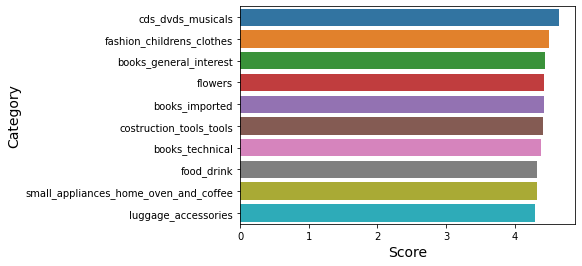

In [ ]:
prodnote_hist = sns.barplot( y=product_rew["product_category_name_english"][:10], x=product_rew["review_score"][:10]);
sns.set_context("talk")
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,8)})
plt.xlabel('Score', fontsize = 14)
plt.ylabel('Category', fontsize = 14)
plt.show()

In [ ]:
# 카테고리 별 합계 구하기
prodcat = prd_pay_review.groupby(['product_category_name_english']).sum().reset_index() 
prodcat = prodcat[prodcat['product_category_name_english'] != 'None']
prodcat = prodcat.sort_values(by='payment_value', ascending=False)
prodcat

,product_category_name_english,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,price,freight_value,review_score
8,bed_bath_table,370482192,13928,42170,1725465.67,1095770.05,217807.32,46092
44,health_beauty,343399332,10463,30092,1646292.53,1290883.52,187978.10,41148
16,computers_accessories,293804218,8520,18352,1592611.66,944992.54,153483.43,31902
40,furniture_decor,308990309,9641,27325,1427214.01,765336.72,181307.11,34204
71,watches_gifts,222736815,6464,22617,1420682.17,1245783.11,103643.12,24753
...,...,...,...,...,...,...,...,...
36,flowers,959088,31,43,1922.77,1000.24,453.55,137
47,home_comfort_2,876195,29,42,1458.54,734.47,375.97,102
12,cds_dvds_musicals,628547,14,36,1199.43,730.00,224.99,65
30,fashion_childrens_clothes,267614,8,15,785.67,569.85,95.51,36


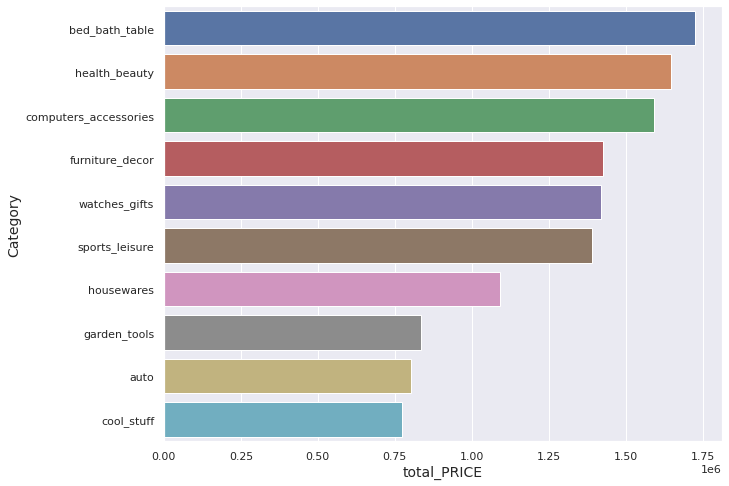

In [ ]:
catorderhist = sns.barplot( y=prodcat["product_category_name_english"][:10], x=prodcat["payment_value"][:10]);
sns.set_context("talk")
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,8)})
plt.xlabel('total_PRICE', fontsize = 14)
plt.ylabel('Category', fontsize = 14)
plt.show()

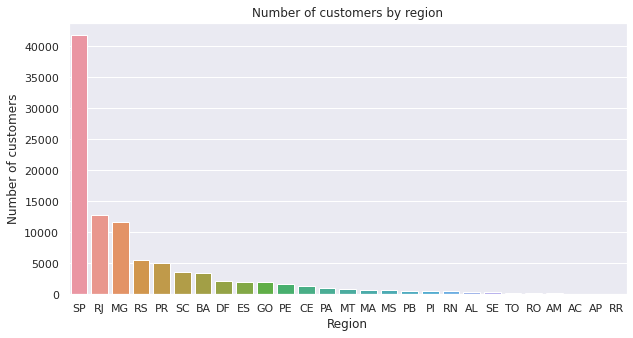

In [ ]:
# 지역별 고객 정보
plt.figure(figsize=(10,5))
plt.title('Number of customers by region')
plt.ylabel('Number of customers')
plt.xlabel('Region')
sns.barplot(x=df_customers['customer_state'].value_counts().index,y=df_customers['customer_state'].value_counts().values)

### RFM 분석
- Recency : 최근
- Frequency : 빈도
- Monetary : 총 금액

In [ ]:
transaction_data = data[['customer_id','frequency','recent','payment_value']]
print(transaction_data.shape)
transaction_data.head()

(96015, 4)


,customer_id,frequency,recent,payment_value
14282,b246eeed30b362c09d867b9e598bee51,22,268,40.85
57428,5e0f7317756669ff7b384444dbb81fa3,21,83,332.46
40532,1d4411212e90d6a24fd2d09f74878b48,16,69,460.64
90984,54ca6dc5e99a82fe5112744bc4e9ef26,15,87,509.01
14498,1eebfdb7083031b40f727fb71f6cd5b2,15,171,86.99


In [ ]:
df_RFM = transaction_data.rename(columns={"payment_value": "monetary_value"})
df_RFM = df_RFM.reset_index()
df_RFM

,index,customer_id,frequency,recent,monetary_value
0,14282,b246eeed30b362c09d867b9e598bee51,22,268,40.85
1,57428,5e0f7317756669ff7b384444dbb81fa3,21,83,332.46
2,40532,1d4411212e90d6a24fd2d09f74878b48,16,69,460.64
3,90984,54ca6dc5e99a82fe5112744bc4e9ef26,15,87,509.01
4,14498,1eebfdb7083031b40f727fb71f6cd5b2,15,171,86.99
...,...,...,...,...,...
96010,72845,90524e55a20cda4c520f6a6e893bda6f,1,120,35.83
96011,2125,43981e5a9d93f53478bc206f92df4b71,1,181,176.65
96012,24339,4032cde8ae95228972fedbfbb48bf6a1,1,249,163.79
96013,76338,4a4c09d4ad0ff0d20520bda4a709d1a6,1,460,144.91


In [ ]:
df_RFM = df_RFM[df_RFM['frequency']>0] # 구매가 있는 고객 대상
df_RFM.describe()

,index,frequency,recent,monetary_value
count,96015.000000,96015.000000,96015.00000,96015.000000
mean,48959.719117,1.160433,244.60176,162.582852
std,28259.967271,0.536294,153.34524,169.390248
min,0.000000,1.000000,0.00000,9.590000
25%,24493.500000,1.000000,121.00000,62.175000
50%,48960.000000,1.000000,226.00000,107.780000
75%,73431.500000,1.000000,354.00000,188.960000
max,97915.000000,22.000000,728.00000,1262.920000


In [ ]:
# 분위수
quintiles = df_RFM[['recent', 'frequency', 'monetary_value']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recent': {0.2: 100.0, 0.4: 184.0, 0.6: 275.0, 0.8: 390.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary_value': {0.2: 54.44, 0.4: 86.72, 0.6: 133.75, 0.8: 217.86}}

In [ ]:
def r_score(x):
    if x <= quintiles['recent'][.2]:
        return 5
    elif x <= quintiles['recent'][.4]:
        return 4
    elif x <= quintiles['recent'][.6]:
        return 3
    elif x <= quintiles['recent'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

In [ ]:
df_RFM['R'] = df_RFM['recent'].apply(lambda x: r_score(x))
df_RFM['F'] = df_RFM['frequency'].apply(lambda x: fm_score(x, 'frequency'))
df_RFM['M'] = df_RFM['monetary_value'].apply(lambda x: fm_score(x, 'monetary_value'))
df_RFM['RFM Score'] = df_RFM['R'].map(str) + df_RFM['F'].map(str) + df_RFM['M'].map(str)
df_RFM.head()

,index,customer_id,frequency,recent,monetary_value,R,F,M,RFM Score
0,14282,b246eeed30b362c09d867b9e598bee51,22,268,40.85,3,5,1,351
1,57428,5e0f7317756669ff7b384444dbb81fa3,21,83,332.46,5,5,5,555
2,40532,1d4411212e90d6a24fd2d09f74878b48,16,69,460.64,5,5,5,555
3,90984,54ca6dc5e99a82fe5112744bc4e9ef26,15,87,509.01,5,5,5,555
4,14498,1eebfdb7083031b40f727fb71f6cd5b2,15,171,86.99,4,5,3,453


In [ ]:
segt_map = {
    r'[1-2][1-2]': '최근구매없음/구매횟수적음',
    r'[1-2][3-4]': '최근구매없음/구매횟수보통',
    r'[1-2]5': '최근구매없음/구매횟수많음',
    r'3[1-2]': '비교적최근구매함/구매횟수적음',
    r'33': '비교적최근구매함/구매횟수보통',
    r'[3-4][4-5]': '최근구매함/구매횟수많음',
    r'41': '최근구매함/구매횟수적음',
    r'51': '방금전구매함/구매횟수적음',
    r'[4-5][2-3]': '방금전구매함/구매횟수보통/프로모션대상',
    r'5[4-5]': '방금전구매함/구매횟수많음'
}

df_RFM['Segment'] = df_RFM['R'].map(str) + df_RFM['F'].map(str)
df_RFM['Segment'] = df_RFM['Segment'].replace(segt_map, regex=True)
df_RFM.head()

,index,customer_id,frequency,recent,monetary_value,R,F,M,RFM Score,Segment
0,14282,b246eeed30b362c09d867b9e598bee51,22,268,40.85,3,5,1,351,최근구매함/구매횟수많음
1,57428,5e0f7317756669ff7b384444dbb81fa3,21,83,332.46,5,5,5,555,방금전구매함/구매횟수많음
2,40532,1d4411212e90d6a24fd2d09f74878b48,16,69,460.64,5,5,5,555,방금전구매함/구매횟수많음
3,90984,54ca6dc5e99a82fe5112744bc4e9ef26,15,87,509.01,5,5,5,555,방금전구매함/구매횟수많음
4,14498,1eebfdb7083031b40f727fb71f6cd5b2,15,171,86.99,4,5,3,453,최근구매함/구매횟수많음


In [ ]:
df_RFM['Segment'].unique()

array(['최근구매함/구매횟수많음', '방금전구매함/구매횟수많음', '최근구매없음/구매횟수많음', '최근구매없음/구매횟수적음',
       '최근구매함/구매횟수적음', '방금전구매함/구매횟수적음', '비교적최근구매함/구매횟수적음'], dtype=object)

In [ ]:
# segments_counts = df_RFM['Segment'].value_counts().sort_values(ascending=True)

# fig, ax = plt.subplots()

# bars = ax.barh(range(len(segments_counts)),
#               segments_counts,
#               color='b')

# ax.set_frame_on(False)
# ax.tick_params(left=False,
#                bottom=False,
#                labelbottom=False)

# ax.set_yticks(range(len(segments_counts)))
# ax.set_yticklabels(segments_counts.index,  fontsize = 14)

# for i, bar in enumerate(bars):
#         value = bar.get_width()
#         if segments_counts.index[i] in ['방금전구매함/구매횟수보통/프로모션대상', '방금전구매함/구매횟수많음']:
#             bar.set_color('r')
#         ax.text(value,
#                 bar.get_y() + bar.get_height()/2,
#                 '{:,} ({:}%)'.format(int(value),
#                                    int(value*100/segments_counts.sum())),
#                 va='center',
#                 ha='left'
#                )
# sns.set(rc={'figure.figsize':(5,10)})
# plt.show()

In [ ]:
# segments_counts

### KMEANS-Clustering

#### feature 선택

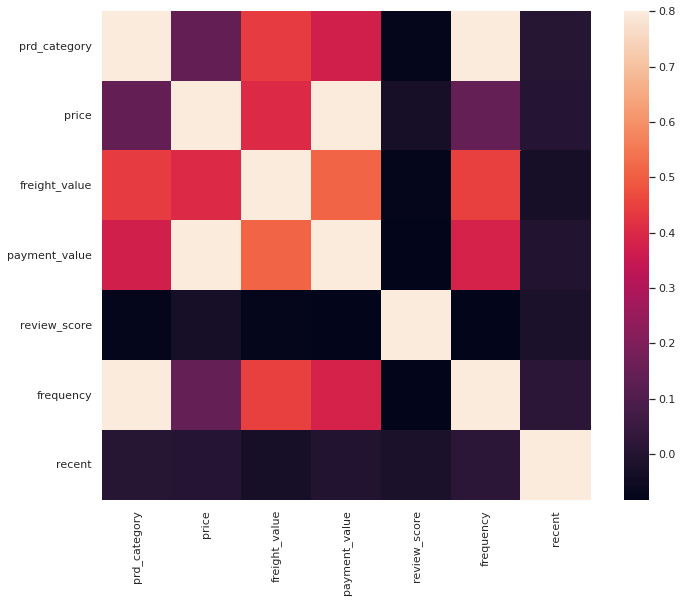

In [ ]:
# 상관관계 확인 > 상관관계가 너무 높은 경우 삭제
sns.set(style="white")
corrmat = data.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
num_feat = data.select_dtypes('number').columns.values
comb_num_feat = np.array(list(combinations(num_feat, 2)))
corr_num_feat = np.array([])
for comb in comb_num_feat:
    corr = pearsonr(data[comb[0]], data[comb[1]])[0]
    corr_num_feat = np.append(corr_num_feat, corr)

In [ ]:
high_corr_num = comb_num_feat[np.abs(corr_num_feat) >= 0.95]
high_corr_num

array([['prd_category', 'frequency']], dtype='<U13')

In [ ]:
data.columns

Index(['customer_id', 'prd_category', 'price', 'freight_value',
       'payment_value', 'review_score', 'frequency', 'recent'],
      dtype='object')

In [ ]:
# 상관계수가 너무 높은 변수 제외
grouping_variables = ['payment_value', 'freight_value', 'review_score', 'recent','price'] 

In [ ]:
df_reduced = data[grouping_variables]

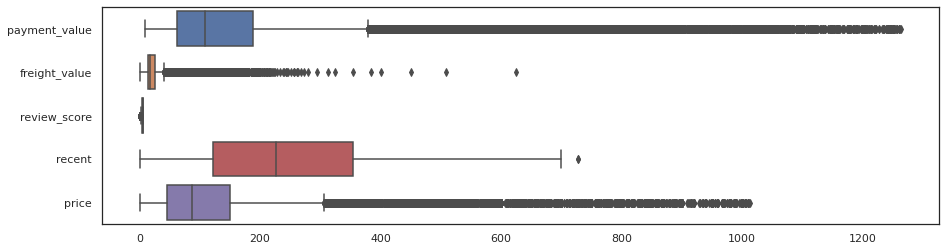

In [ ]:
plt.figure(figsize = (15,4))
sns.boxplot(data = df_reduced, orient = "h")
plt.show()

#### 스케일링

In [ ]:
X = df_reduced.values
X_scaled = scale(X)
print('X meanX',np.mean(X_scaled),',X standard deviation:',np.std(X_scaled))

X meanX 1.0857764952426381e-16 ,X standard deviation: 0.9999999999999998


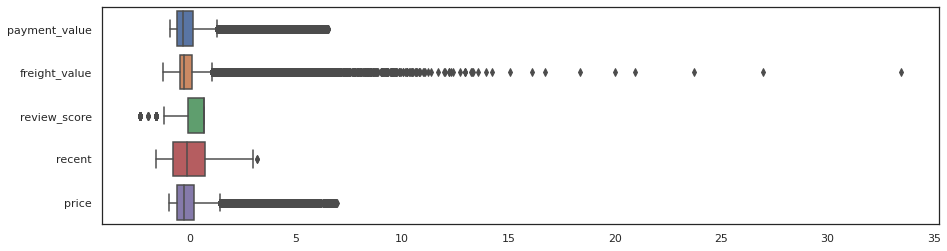

In [ ]:
scaled_dataframe = pd.DataFrame( X_scaled, columns = df_reduced.columns )
plt.figure(figsize = (15,4))
sns.boxplot(data = scaled_dataframe, orient = "h")
plt.show()


#### 데이터 분할


In [ ]:
len(X)

96015

In [ ]:
split_size = int(len(X) * 0.9)
X_train, X_test = X[:split_size], X[split_size:]
len(X_train), len(X_test)

(86413, 9602)

In [ ]:
data.shape

(96015, 8)

#### 클러스터링

In [ ]:
from sklearn.cluster import KMeans
wcss_all = []
allgaps = []

def optimalK(data, nrefs=3, maxClusters=10):
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        wcss = np.zeros(nrefs)

        # 랜덤 샘플링으로 형태가 같은 데이터를 만들고 주어진 n에 대하여 클러스터링
        for i in range(nrefs):
            randomReference = np.random.random_sample(size=data.shape)
            kmeans = KMeans(k)
            kmeans.fit(randomReference)
            
            w = kmeans.inertia_
            wcss[i] = w

        # 분석 대상 데이터로 주어진 n에 대하여 클러스터링
        kmeans = KMeans(n_clusters = k, init="k-means++", random_state=10)
        kmeans.fit(data)
        
        origin_w = kmeans.inertia_

        # 랜덤 샘플링 데이터에 대한 wcss 의 평균과 분석 대상 데이터의 Inertia value 의 차이를 gap 으로 저장
        gap = np.log(np.mean(wcss)) - np.log(origin_w)
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap, 'origin_w':round(origin_w/100000000,1)}, ignore_index=True)
        allgaps.append(gap)
        wcss_all.append(origin_w)

    print(resultsdf)        
    return(resultsdf)

> kmeans 클러스터링 알고리즘은 클러스터 개수와 초기값을 지정해야함
>
> 랜덤 샘플링을 통해 초기값 설정



In [ ]:
# 랜덤으로 클러스터링 한 것과 데이터로 클러스터링 한 것의 차이 확인
resultsdf = optimalK(X_train, nrefs=3, maxClusters=10)

   clusterCount        gap  origin_w
0           1.0 -12.036618      60.8
1           2.0 -11.677478      36.1
2           3.0 -11.352131      23.3
3           4.0 -11.204725      18.1
4           5.0 -11.119514      15.3
5           6.0 -11.072129      13.5
6           7.0 -11.006463      11.9
7           8.0 -10.948007      10.5
8           9.0 -10.923537       9.6


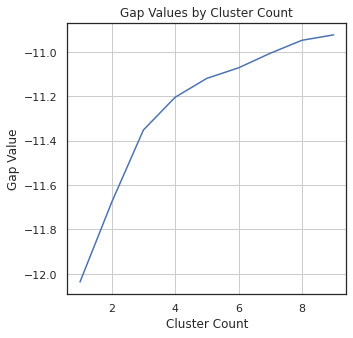

In [ ]:
# gap 시각화, gap의 변화량이 작아지는 순간의 k값
plt.figure(figsize=(5,5))
plt.plot(range(1,10), allgaps)
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

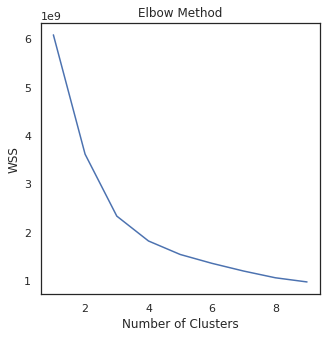

In [ ]:
# wcss 값으로 시각화 > ellow method 결과 k는 4
plt.figure(figsize=(5,5))
plt.plot(range(1, 10), wcss_all)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.show()

In [ ]:
# k = 4로 설정하고 X_train데이터 학습
kmeans = KMeans(n_clusters=4, init="random", random_state=10)
clusts_train = kmeans.fit_predict(X_train)

In [ ]:
clusts_test = np.zeros(len(X_test))
clusts_test = clusts_test + 42
clusts_test

array([42., 42., 42., ..., 42., 42., 42.])

In [ ]:
clust = np.concatenate((clusts_train, clusts_test), axis=None)
df_train = pd.DataFrame.from_records(X_train)
df_test = pd.DataFrame.from_records(X_test)
df_clustered = pd.concat([df_train, df_test])
df_clustered.head()

,0,1,2,3,4
0,40.85,260.70,5.0,268.0,638.00
1,332.46,166.74,4.0,83.0,609.00
2,460.64,142.24,5.0,69.0,318.40
3,509.01,278.90,5.0,87.0,569.45
4,86.99,449.85,5.0,171.0,855.00


### PCA

In [ ]:
pca_feat = PCA(n_components=2)
X_PCA = pca_feat.fit_transform(df_clustered)
print(pca_feat.explained_variance_ratio_)

features = range(pca_feat.n_components_)

[0.60479506 0.34015196]


In [ ]:
df_PCA = pd.DataFrame.from_records(X_PCA)
clust_series = pd.Series(clust)
clust_series.head()

0    1.0
1    1.0
2    1.0
3    3.0
4    1.0
dtype: float64

In [ ]:
df_PCA = df_PCA.assign(cluster = clust_series)
df_PCA

,0,1,cluster
0,212.037773,25.517359,1.0
1,427.332969,-160.429371,1.0
2,360.540408,-176.252926,1.0
3,552.287976,-157.715539,3.0
4,384.335082,-71.285713,1.0
...,...,...,...
96010,-164.698942,-124.595260,42.0
96011,32.274795,-63.459443,42.0
96012,15.504866,4.544512,42.0
96013,-13.588706,215.476655,42.0


In [ ]:
df_PCA = df_PCA.rename(columns={0: 'PCA_1', 1: 'PCA_2'})
df_PCA["cluster"].replace({0: "Cluster 1", 1: "Cluster 2", 2: "Cluster 3", 3: "Cluster 4", 42: "Test values"}, inplace=True)
df_PCA.head()

,PCA_1,PCA_2,cluster
0,212.037773,25.517359,Cluster 2
1,427.332969,-160.429371,Cluster 2
2,360.540408,-176.252926,Cluster 2
3,552.287976,-157.715539,Cluster 4
4,384.335082,-71.285713,Cluster 2


In [ ]:
df_PCA = df_PCA.dropna()
print(df_PCA.columns, df_PCA.shape)

Index(['PCA_1', 'PCA_2', 'cluster'], dtype='object') (96015, 3)


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


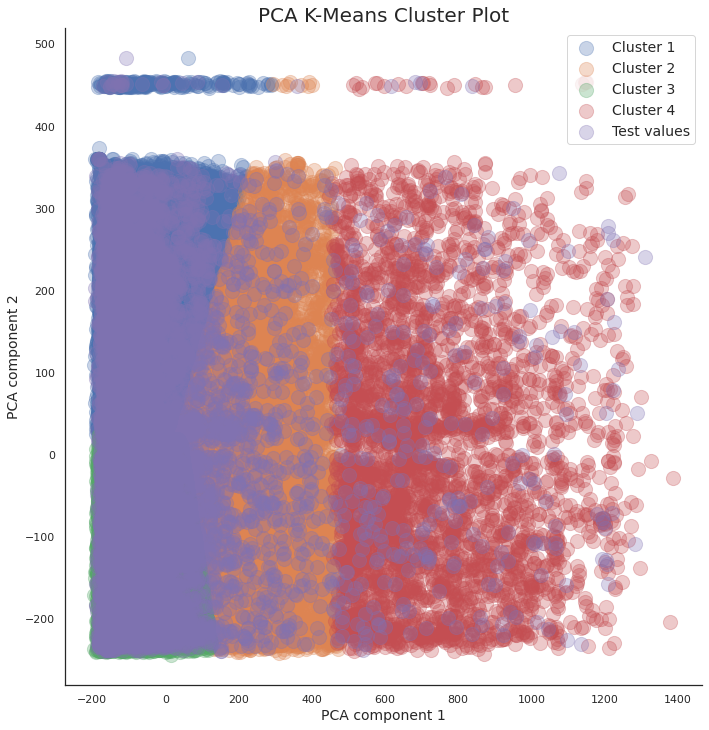

In [ ]:
# 시각화
orderhue= ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4','Test values']
sns.lmplot(x = 'PCA_1', y = 'PCA_2', data = df_PCA, fit_reg = False, legend = False, size = 10, hue = "cluster", hue_order= orderhue, scatter_kws={"s":200, "alpha":0.3} )
plt.xlabel('PCA component 1', fontsize = 14)
plt.ylabel('PCA component 2', fontsize = 14)
plt.title('PCA K-Means Cluster Plot', fontsize = 20)
plt.legend(fontsize = 14)
plt.show()

T-SNE : 차원의 복잡한 데이터를 2차원에 차원 축소하는 방법, 낮은 차원 공간의 시각화에 주로 사용하며 차원 축소할 때는 비슷한 구조끼리 데이터를 정리

In [ ]:
tsne = TSNE(n_components=2, perplexity=31, random_state=2020 )

In [ ]:
X_concat = df_clustered.values
X_TSNE = tsne.fit_transform(X_concat)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
df_TSNE = pd.DataFrame.from_records(X_TSNE)
print(df_TSNE.shape)
df_TSNE.head()

(96015, 2)


,0,1
0,16.650587,-53.006626
1,14.067024,-53.875961
2,-47.892849,24.703865
3,13.750273,-53.296852
4,15.545696,-53.887981


In [ ]:
clust_series = pd.Series(clust)

In [ ]:
df_TSNE = df_TSNE.assign(cluster = clust_series)

print(df_TSNE.columns, df_TSNE.shape)
df_TSNE = df_TSNE.rename(columns={0: 'TSNE_1', 1: 'TSNE_2'})
df_TSNE["cluster"].replace({0: "Cluster 1", 1: "Cluster 2", 2: "Cluster 3", 3: "Cluster 4", 42: "Test values"}, inplace=True)
df_TSNE.head()

Index([0, 1, 'cluster'], dtype='object') (96015, 3)


,TSNE_1,TSNE_2,cluster
0,16.650587,-53.006626,Cluster 2
1,14.067024,-53.875961,Cluster 2
2,-47.892849,24.703865,Cluster 2
3,13.750273,-53.296852,Cluster 4
4,15.545696,-53.887981,Cluster 2


In [ ]:
df_TSNE["cluster"].value_counts()

Cluster 3      40227
Cluster 1      29773
Cluster 2      12536
Test values     9602
Cluster 4       3877
Name: cluster, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


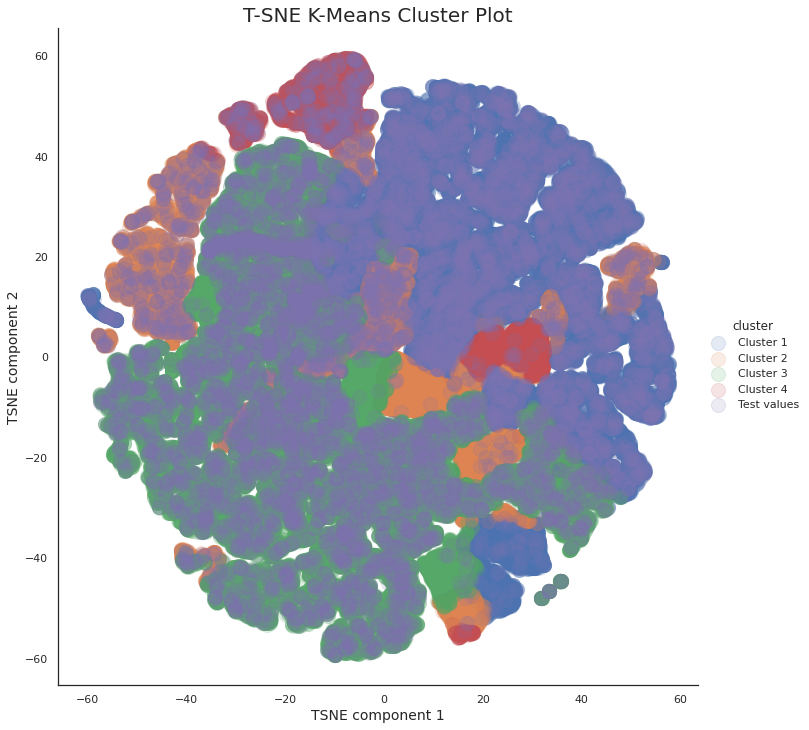

In [ ]:
orderhue= ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4','Test values']
sns.lmplot(x = 'TSNE_1', y = 'TSNE_2', data = df_TSNE, fit_reg = False, legend = True, size = 10, hue = "cluster", hue_order= orderhue, scatter_kws={"s":200, "alpha":0.15} )
plt.xlabel('TSNE component 1', fontsize = 14)
plt.ylabel('TSNE component 2', fontsize = 14)
plt.rc('font', family='NanumBarunGothic')
plt.title('T-SNE K-Means Cluster Plot', fontsize = 20)
plt.show()

#### 박스플롯

In [ ]:
columnsvector = df_reduced.columns
print(columnsvector)
df_train_labeled = df_train
df_train_labeled.columns = columnsvector

Index(['payment_value', 'freight_value', 'review_score', 'recent', 'price'], dtype='object')


In [ ]:
df_train_labeled = df_train_labeled.assign(cluster = clusts_train)
df_train_labeled["cluster"].replace({0: "Cluster 1", 1: "Cluster 2", 2: "Cluster 3", 3: "Cluster 4"}, inplace=True)
df_train_labeled.head()

,payment_value,freight_value,review_score,recent,price,cluster
0,40.85,260.70,5.0,268.0,638.00,Cluster 2
1,332.46,166.74,4.0,83.0,609.00,Cluster 2
2,460.64,142.24,5.0,69.0,318.40,Cluster 2
3,509.01,278.90,5.0,87.0,569.45,Cluster 4
4,86.99,449.85,5.0,171.0,855.00,Cluster 2


In [ ]:
x1 = df_train_labeled["cluster"]
y0 = df_train_labeled[df_train_labeled.columns[0]]
y1 = df_train_labeled[df_train_labeled.columns[1]]
y2 = df_train_labeled[df_train_labeled.columns[2]]
y3 = df_train_labeled[df_train_labeled.columns[3]]
y4 = df_train_labeled[df_train_labeled.columns[4]]

order = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

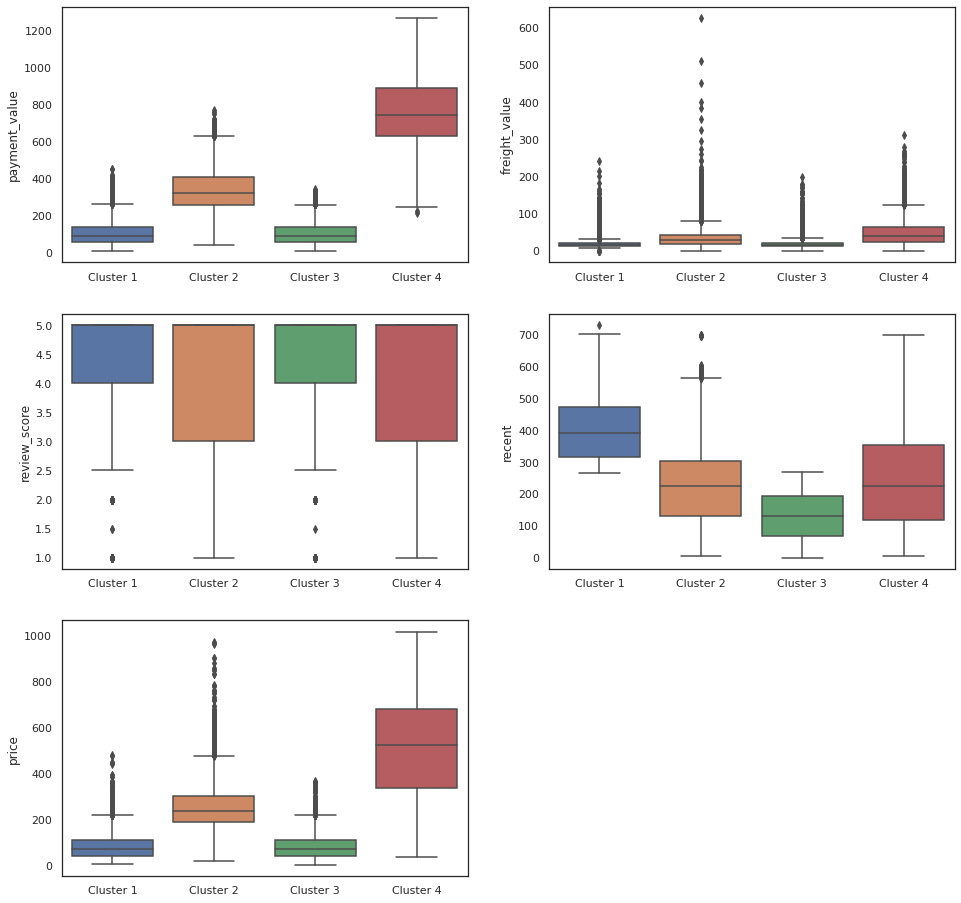

In [ ]:
plt.figure(figsize=(16,16))

plt.xlabel('')
plt.subplot(321)
plt.xticks([])

sns.boxplot(x1, y0,order= order, showfliers = True, data  = df_train_labeled)

plt.xlabel('')
plt.subplot(322)
plt.xticks([])

sns.boxplot(x1, y1,order= order, showfliers = True, data  = df_train_labeled)
plt.xlabel('')

plt.subplot(323)
plt.xticks([])


sns.boxplot(x1, y2,order= order, showfliers = True, data  = df_train_labeled)
plt.xlabel('')

plt.subplot(324)
sns.boxplot(x1, y3,order= order, showfliers = True, data  = df_train_labeled)

plt.xlabel('')

plt.subplot(325)
sns.boxplot(x1, y4,order= order, showfliers = True, data  = df_train_labeled)

plt.xlabel('')
plt.show()

### 클러스터 라벨링

In [ ]:
km = KMeans(n_clusters=4, init="random", random_state=10)
clusts_test1 = km.fit_predict(X_test)

In [ ]:
df_test_labeled = df_test.assign(cluster = clusts_test1)
df_test_labeled["cluster"].replace({0: "Cluster 1", 1: "Cluster 2", 2: "Cluster 3", 3: "Cluster 4"}, inplace=True)
df_test_labeled.head()

,0,1,2,3,4,cluster
0,28.69,16.79,4.0,208.0,11.90,Cluster 4
1,55.46,15.56,4.0,529.0,39.90,Cluster 1
2,103.33,23.43,4.0,215.0,79.90,Cluster 4
3,92.57,13.57,5.0,263.0,79.00,Cluster 4
4,116.94,16.95,4.0,313.0,99.99,Cluster 1


In [ ]:
print (len(df_train_labeled["cluster"]))
(df_train_labeled["cluster"].value_counts()/len(df_train_labeled["cluster"]))*100

86413


Cluster 3    46.552023
Cluster 1    34.454307
Cluster 2    14.507076
Cluster 4     4.486593
Name: cluster, dtype: float64

In [ ]:
print (len(df_test_labeled["cluster"]))
(df_test_labeled["cluster"].value_counts()/len(df_test_labeled["cluster"]))*100

9602


Cluster 4    54.634451
Cluster 1    30.431160
Cluster 2    11.841283
Cluster 3     3.093106
Name: cluster, dtype: float64